In [3]:
import pandas as pd
import numpy as np

In [6]:
content_df=pd.read_csv("Content.csv")
reaction_df=pd.read_csv("Reactions.csv")
reaction_types_df=pd.read_csv("ReactionTypes.csv")

In [7]:
content_df.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [8]:
reaction_df.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [10]:
reaction_types_df.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [30]:
content_df.drop(columns='Unnamed: 0',inplace=True)
reaction_df.drop(columns='Unnamed: 0',inplace=True)
reaction_types_df.drop(columns='Unnamed: 0',inplace=True)

In [31]:
print(content_df.shape)
print(reaction_df.shape)
reaction_types_df.shape

(801, 5)
(22534, 4)


(16, 3)

In [32]:
reaction_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 22534 entries, 1 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  22534 non-null  object
 1   User ID     22534 non-null  object
 2   Type        22534 non-null  object
 3   Datetime    22534 non-null  object
dtypes: object(4)
memory usage: 880.2+ KB


In [33]:
#user id and Type column have missing data
#removing rows with missing values
reaction_df.dropna(how="any",inplace=True)

In [34]:
content_df.describe(include="all").T

,count,unique,top,freq
Content ID,801,801,97522e57-d9ab-4bd6-97bf-c24d952602d2,1
User ID,801,408,b473e898-b7b0-4a57-959d-484bf4cc4483,7
Type,801,4,photo,211
Category,801,17,travel,60
URL,801,801,https://socialbuzz.cdn.com/content/storage/975...,1


In [35]:
#some missig URLs
content_df.dropna(how="any",inplace=True)

In [36]:
reaction_types_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes


In [39]:
merged_df=pd.merge(reaction_df,content_df,how="inner",on='User ID')

In [43]:
merged_df=pd.merge(merged_df,reaction_types_df,how="left",left_on='Type_x',right_on='Type')

In [44]:
merged_df

,Content ID_x,User ID,Type_x,Datetime,Content ID_y,Type_y,Category,URL,Type,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,7913b30d-19fd-4900-8a68-ce141192b3ec,audio,cooking,https://socialbuzz.cdn.com/content/storage/791...,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,interested,2021-05-22 19:44:23,7913b30d-19fd-4900-8a68-ce141192b3ec,audio,cooking,https://socialbuzz.cdn.com/content/storage/791...,interested,positive,30
2,f332d362-dc48-46c2-a64b-641157c0987e,5d454588-283d-459d-915d-c48a2cb4c27f,interested,2020-12-12 15:31:52,7913b30d-19fd-4900-8a68-ce141192b3ec,audio,cooking,https://socialbuzz.cdn.com/content/storage/791...,interested,positive,30
3,34a3747a-0b77-42f6-ae19-87c38b94b674,5d454588-283d-459d-915d-c48a2cb4c27f,worried,2020-11-17 18:45:49,7913b30d-19fd-4900-8a68-ce141192b3ec,audio,cooking,https://socialbuzz.cdn.com/content/storage/791...,worried,negative,12
4,ec8e2d25-5730-4753-a0a2-d1ed41e23623,5d454588-283d-459d-915d-c48a2cb4c27f,interested,2020-11-17 00:10:23,7913b30d-19fd-4900-8a68-ce141192b3ec,audio,cooking,https://socialbuzz.cdn.com/content/storage/791...,interested,positive,30
...,...,...,...,...,...,...,...,...,...,...,...
36075,c13e7406-c610-4721-b80d-2b5ad533e90a,05782669-264e-4c14-990e-14c8dbb13bef,love,2020-08-19 16:21:36,f332d362-dc48-46c2-a64b-641157c0987e,GIF,soccer,https://socialbuzz.cdn.com/content/storage/f33...,love,positive,65
36076,c13e7406-c610-4721-b80d-2b5ad533e90a,05782669-264e-4c14-990e-14c8dbb13bef,love,2020-08-19 16:21:36,fada6910-2cc5-4600-808c-1e6066f795a6,GIF,technology,https://socialbuzz.cdn.com/content/storage/fad...,love,positive,65
36077,c13e7406-c610-4721-b80d-2b5ad533e90a,05782669-264e-4c14-990e-14c8dbb13bef,love,2020-08-19 16:21:36,ec8e2d25-5730-4753-a0a2-d1ed41e23623,video,healthy eating,https://socialbuzz.cdn.com/content/storage/ec8...,love,positive,65
36078,c13e7406-c610-4721-b80d-2b5ad533e90a,05782669-264e-4c14-990e-14c8dbb13bef,love,2020-08-19 16:21:36,4f215b36-f5c4-4294-81f2-80e4906b197d,video,soccer,https://socialbuzz.cdn.com/content/storage/4f2...,love,positive,65


In [45]:
merged_df.isna().sum()

Content ID_x    0
User ID         0
Type_x          0
Datetime        0
Content ID_y    0
Type_y          0
Category        0
URL             0
Type            0
Sentiment       0
Score           0
dtype: int64

In [47]:
merged_df.to_csv("cleaned merged data.csv",index=False)

In [48]:
#visualizations


In [83]:
#Top 5 categories with largest aggergated popularities

In [84]:
top_categories=merged_df[['Category','Score']].groupby(by="Category").sum().sort_values(by='Score',ascending=False).head(5)

In [107]:
top_categories

,Score
Category,
travel,108911
culture,99342
science,98835
animals,96962
tennis,95726


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\Acer\AppData\Local\Temp\ipykernel_4116\3025773813.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=top_categories.index.values,rotation=45)


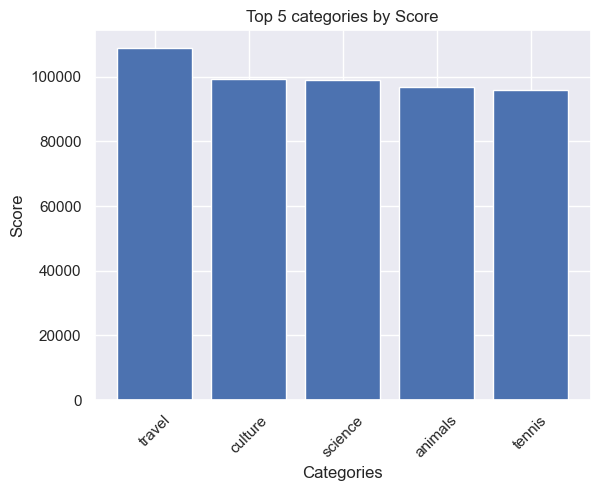

In [173]:
fig,ax=plt.subplots()
bar=plt.bar(top_categories.index.values,top_categories.Score.values,color="b")
ax.set_xticklabels(labels=top_categories.index.values,rotation=45)
ax.set_title('Top 5 categories by Score')
ax.set_ylabel("Score")
ax.set_xlabel("Categories")
fig.savefig("top 5 catagories")

In [128]:
#category wise total reactions

In [136]:
reaction_by_categories=merged_df[['Category',"Type_x"]].groupby(["Category",'Type_x']).value_counts()

In [144]:
reaction_by_categories=reaction_by_categories.unstack()

In [162]:
reaction_by_categories.T

Category,Studying,animals,cooking,culture,dogs,education,fitness,food,healthy eating,public speaking,science,soccer,studying,technology,tennis,travel,veganism
Type_x,,,,,,,,,,,,,,,,,
adore,NaN,154.0,156.0,156.0,145.0,162.0,154.0,134.0,110.0,113.0,158.0,139.0,104.0,172.0,153.0,189.0,118.0
cherish,2.0,153.0,158.0,160.0,132.0,147.0,136.0,130.0,148.0,112.0,139.0,138.0,98.0,144.0,139.0,154.0,119.0
disgust,3.0,132.0,133.0,138.0,134.0,115.0,164.0,124.0,154.0,107.0,198.0,134.0,116.0,163.0,149.0,167.0,116.0
dislike,2.0,151.0,145.0,126.0,142.0,123.0,143.0,129.0,141.0,100.0,142.0,140.0,112.0,148.0,154.0,170.0,118.0
hate,3.0,142.0,148.0,141.0,130.0,140.0,151.0,148.0,144.0,105.0,132.0,141.0,130.0,150.0,165.0,163.0,124.0
heart,4.0,158.0,127.0,157.0,131.0,150.0,174.0,152.0,151.0,132.0,186.0,126.0,122.0,181.0,157.0,149.0,131.0
indifferent,2.0,156.0,159.0,133.0,144.0,130.0,145.0,153.0,146.0,109.0,152.0,133.0,134.0,149.0,129.0,152.0,114.0
interested,3.0,151.0,142.0,169.0,149.0,129.0,152.0,141.0,127.0,107.0,145.0,128.0,108.0,119.0,147.0,157.0,104.0
intrigued,4.0,171.0,148.0,144.0,114.0,119.0,154.0,143.0,122.0,132.0,144.0,118.0,97.0,116.0,164.0,156.0,133.0


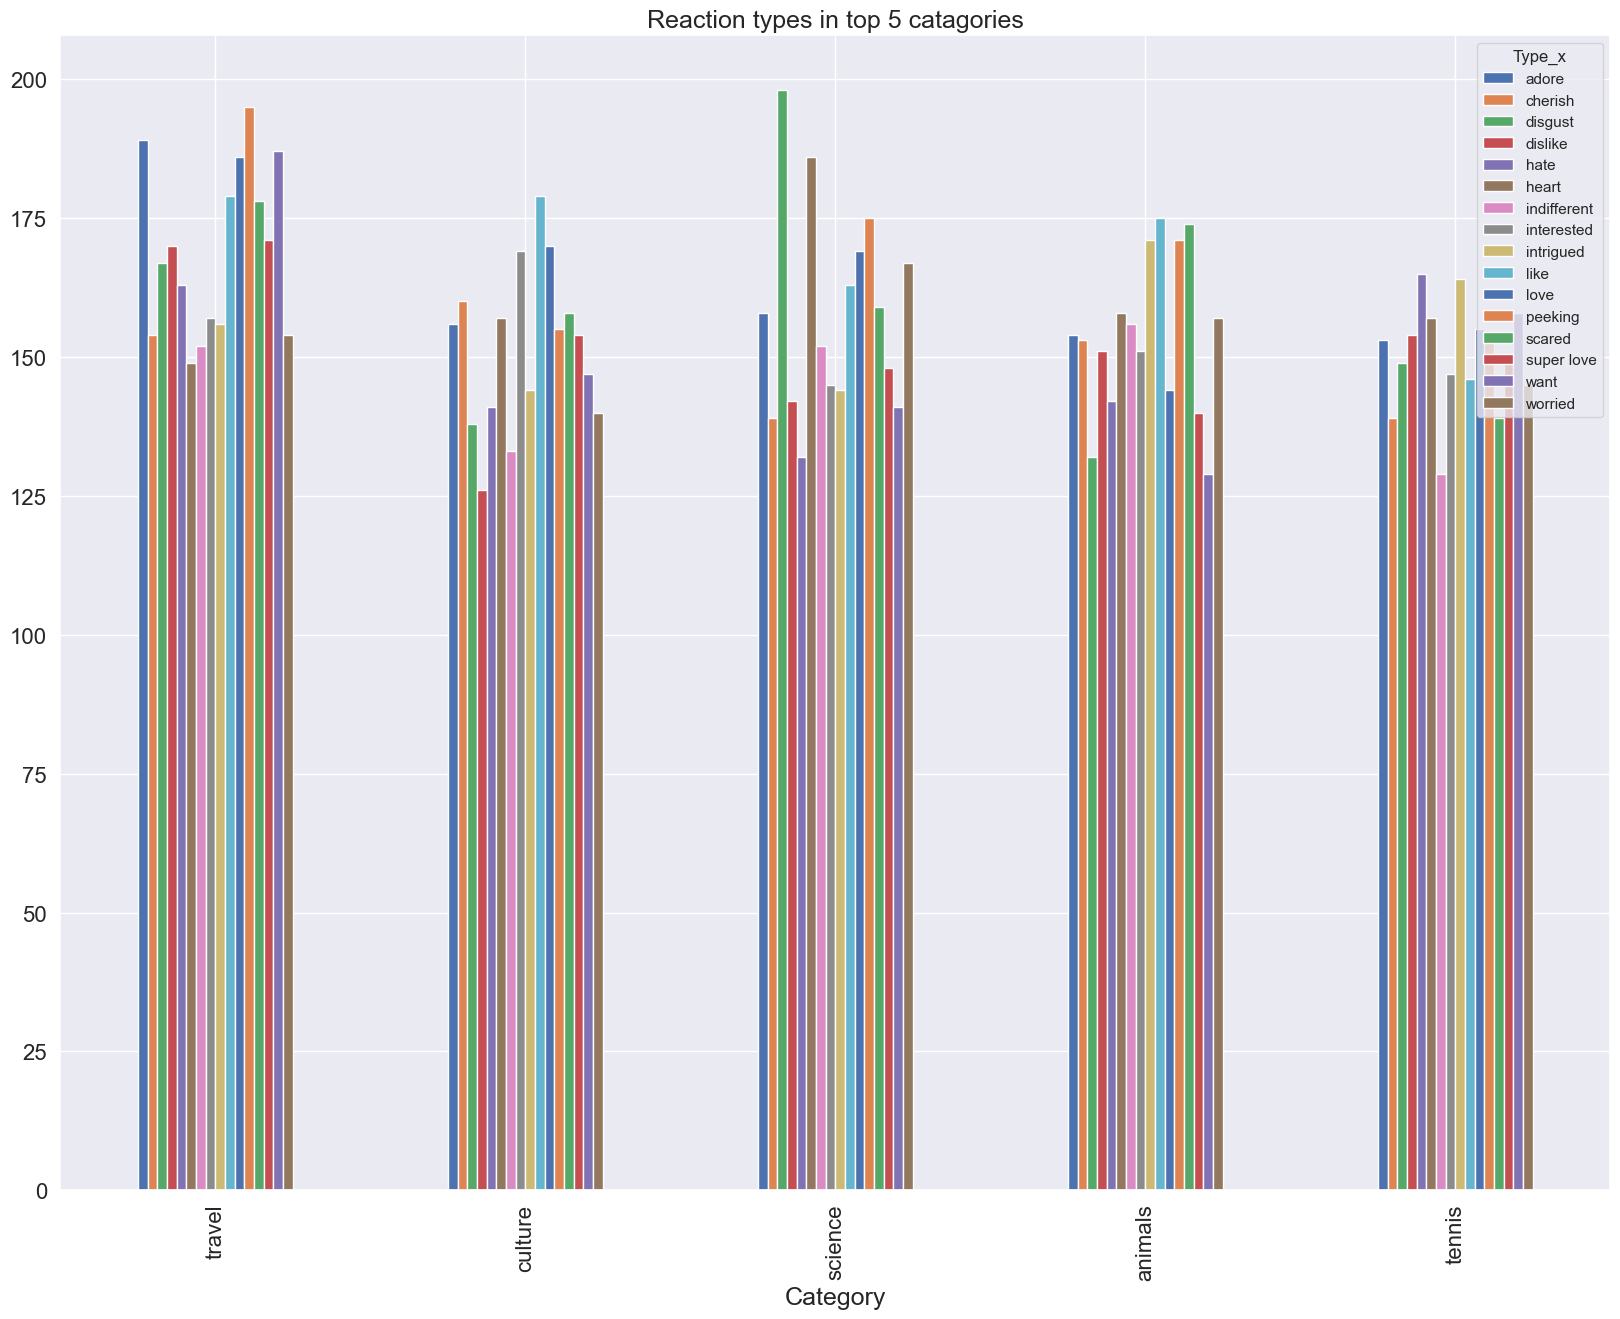

In [204]:
ax=reaction_by_categories.loc[['travel','culture','science','animals','tennis']].plot.bar(figsize=(20,15),fontsize=16)
ax.set_title("Reaction types in top 5 catagories",fontsize=18)
ax.set_xlabel("Category",fontsize=18)
plt.savefig("plot.png")

In [183]:
merged_df.Category.nunique()

17

In [188]:
reaction_by_categories.loc['travel'].sum()

2707.0

In [192]:
merged_df['Datetime']=pd.to_datetime(merged_df.Datetime)

In [195]:
merged_df['Month']=merged_df['Datetime'].dt.month

In [196]:
merged_df

,Content ID_x,User ID,Type_x,Datetime,Content ID_y,Type_y,Category,URL,Type,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,7913b30d-19fd-4900-8a68-ce141192b3ec,audio,cooking,https://socialbuzz.cdn.com/content/storage/791...,disgust,negative,0,11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,interested,2021-05-22 19:44:23,7913b30d-19fd-4900-8a68-ce141192b3ec,audio,cooking,https://socialbuzz.cdn.com/content/storage/791...,interested,positive,30,5
2,f332d362-dc48-46c2-a64b-641157c0987e,5d454588-283d-459d-915d-c48a2cb4c27f,interested,2020-12-12 15:31:52,7913b30d-19fd-4900-8a68-ce141192b3ec,audio,cooking,https://socialbuzz.cdn.com/content/storage/791...,interested,positive,30,12
3,34a3747a-0b77-42f6-ae19-87c38b94b674,5d454588-283d-459d-915d-c48a2cb4c27f,worried,2020-11-17 18:45:49,7913b30d-19fd-4900-8a68-ce141192b3ec,audio,cooking,https://socialbuzz.cdn.com/content/storage/791...,worried,negative,12,11
4,ec8e2d25-5730-4753-a0a2-d1ed41e23623,5d454588-283d-459d-915d-c48a2cb4c27f,interested,2020-11-17 00:10:23,7913b30d-19fd-4900-8a68-ce141192b3ec,audio,cooking,https://socialbuzz.cdn.com/content/storage/791...,interested,positive,30,11
...,...,...,...,...,...,...,...,...,...,...,...,...
36075,c13e7406-c610-4721-b80d-2b5ad533e90a,05782669-264e-4c14-990e-14c8dbb13bef,love,2020-08-19 16:21:36,f332d362-dc48-46c2-a64b-641157c0987e,GIF,soccer,https://socialbuzz.cdn.com/content/storage/f33...,love,positive,65,8
36076,c13e7406-c610-4721-b80d-2b5ad533e90a,05782669-264e-4c14-990e-14c8dbb13bef,love,2020-08-19 16:21:36,fada6910-2cc5-4600-808c-1e6066f795a6,GIF,technology,https://socialbuzz.cdn.com/content/storage/fad...,love,positive,65,8
36077,c13e7406-c610-4721-b80d-2b5ad533e90a,05782669-264e-4c14-990e-14c8dbb13bef,love,2020-08-19 16:21:36,ec8e2d25-5730-4753-a0a2-d1ed41e23623,video,healthy eating,https://socialbuzz.cdn.com/content/storage/ec8...,love,positive,65,8
36078,c13e7406-c610-4721-b80d-2b5ad533e90a,05782669-264e-4c14-990e-14c8dbb13bef,love,2020-08-19 16:21:36,4f215b36-f5c4-4294-81f2-80e4906b197d,video,soccer,https://socialbuzz.cdn.com/content/storage/4f2...,love,positive,65,8


In [199]:
merged_df.groupby('Month')['Content ID_x'].count()

Month
1     3141
2     2775
3     2987
4     2783
5     3112
6     2942
7     3000
8     3082
9     2993
10    3015
11    3026
12    3224
Name: Content ID_x, dtype: int64